## MV

In [277]:
returns = pd.read_csv('Data_return.csv',encoding='cp949')
returns = returns.dropna(axis=0)
returns = returns.iloc[:,1:]
returns.head() # (260, 173)

,삼성전자,현대차,SK하이닉스,한국전력,NAVER,POSCO,삼성생명,삼성전자우,현대모비스,SK텔레콤,...,한국쉘석유,SBS,삼성화재우,세방전지,동아쏘시오홀딩스,신영증권,동국제강,대웅,농심홀딩스,두산건설
1,-0.043739,0.112117,0.000000,-0.032124,-0.029786,0.005131,0.056089,-0.038715,0.036671,-0.011662,...,0.029314,-0.027909,0.011300,0.014749,-0.031623,0.011757,0.012791,0.016809,-0.003436,-0.006144
2,0.034296,0.000000,0.061322,-0.038534,-0.018780,-0.039671,-0.004556,-0.004396,0.009772,-0.020742,...,0.064539,0.000000,-0.013575,0.005839,-0.070715,0.014185,-0.028655,-0.008370,-0.010381,0.099642
3,0.022923,-0.054488,0.052501,0.014185,-0.004750,0.009539,-0.023096,-0.004415,-0.068761,0.005970,...,-0.023183,-0.044366,0.005679,0.032931,-0.004319,-0.031212,-0.017595,-0.031298,-0.015776,-0.050045
4,0.010244,-0.046393,0.044835,0.000000,-0.048789,-0.043110,-0.038100,0.013187,-0.108065,-0.021053,...,-0.054778,0.055623,0.004520,0.013986,-0.017467,-0.020014,0.060277,0.000000,-0.030496,-0.111571
5,-0.009220,0.032970,0.001685,0.000000,0.019801,0.038882,0.042762,-0.022076,0.032353,0.003035,...,-0.004515,-0.038027,0.028891,0.034133,0.000000,0.006716,0.056849,0.020029,0.001820,0.044880


In [288]:
import scipy.optimize as sco

noa = returns.shape[1]
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))

In [338]:
mv_array = np.empty([173,])

for i in range(268) :
    rets = returns.iloc[i:200+i,]

    def statistics(weights):
        weights = np.array(weights)
        pret = np.sum(rets.mean() * weights) * 252
        pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
        return np.array([pret, pvol, pret / pvol])

    def min_func_variance(weights):
        return statistics(weights)[1] ** 2

    optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP',
                           bounds=bnds, constraints=cons)

    mv_array = np.vstack((mv_array,optv['x'].round(4)))

In [508]:
mv_array[1]

array([0.    , 0.    , 0.0108, 0.0358, 0.    , 0.    , 0.0885, 0.    ,
       0.0056, 0.0488, 0.0283, 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.1   , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.0164, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.0027, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0165, 0.    ,
       0.0427, 0.0015, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0523,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
      

In [484]:
mv_df = pd.DataFrame(mv_array).iloc[8:-1,]

In [486]:
mv_df.shape
mv_df.to_csv('mv_df.csv',encoding='cp949')

# 시각화 코드 for PT

banner1: [0.20288184]
banner2: [0.27740299]
banner3: [0.38697808]


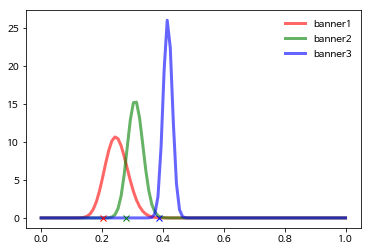

In [2]:
# from scipy.stats import beta
# import matplotlib.pyplot as plt
# import numpy as np

# fig, ax = plt.subplots(1, 1)

# # UCB : Deterministic / Requires update at every round
# # TS : Probabilistic / Can accommodate delayed feedback / Better empirical evidence

# # mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
# x = np.linspace(0, 1, 100)
# ax.plot(x, beta.pdf(x, 33, 100), 'r-', lw=3, alpha=0.6, label='banner1')
# ax.plot(x, beta.pdf(x, 100, 223), 'g-', lw=3, alpha=0.6, label='banner2')
# ax.plot(x, beta.pdf(x, 435, 611), 'b-', lw=3, alpha=0.6, label='banner3')

# banner1_rvs = beta.rvs(33, 100, size=1)
# banner2_rvs = beta.rvs(100, 223, size=1)
# banner3_rvs = beta.rvs(435, 611, size=1)

# print("banner1:", banner1_rvs)
# print("banner2:", banner2_rvs)
# print("banner3:", banner3_rvs)

# ax.plot(banner1_rvs, 0, 'x', color='red')
# ax.plot(banner2_rvs, 0, 'x', color='green')
# ax.plot(banner3_rvs, 0, 'x', color='blue')

# ax.legend(loc='best', frameon=False)
# plt.show()

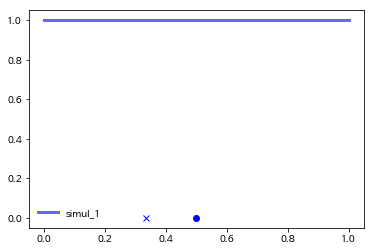

In [102]:
fig, ax = plt.subplots(1, 1)

np.random.seed(777)
x = np.linspace(0, 1, 100)

ax.plot(x, beta.pdf(x, 1, 1), 'b-', lw=3, alpha=0.6, label='simul_1')
ax.plot(beta.mean(1, 1), 0, 'o', color='blue')
ax.plot(beta.rvs(1, 1), 0, 'x', color='blue')

ax.legend(loc='best', frameon=False)
plt.show()

# o : 벤치마크
# x : testing

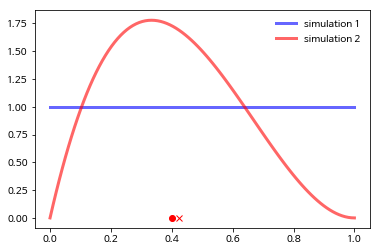

In [112]:
fig, ax = plt.subplots(1, 1)

np.random.seed(777)
x = np.linspace(0, 1, 100)

ax.plot(x, beta.pdf(x, 1, 1), 'b-', lw=3, alpha=0.6, label='simulation 1')
ax.plot(x, beta.pdf(x, 2, 3), 'r-', lw=3, alpha=0.6, label='simulation 2')
ax.plot(beta.mean(2, 3), 0, 'o', color='red')
ax.plot(beta.rvs(2, 3), 0, 'x', color='red')

ax.legend(loc='best', frameon=False)
plt.show()

# o : 벤치마크
# x : testing

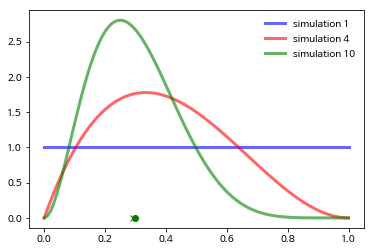

In [120]:
fig, ax = plt.subplots(1, 1)

np.random.seed(777)
x = np.linspace(0, 1, 100)

ax.plot(x, beta.pdf(x, 1, 1), 'b-', lw=3, alpha=0.6, label='simulation 1')
ax.plot(x, beta.pdf(x, 2, 3), 'r-', lw=3, alpha=0.6, label='simulation 4')
ax.plot(x, beta.pdf(x, 3, 7), 'g-', lw=3, alpha=0.6, label='simulation 10')
ax.plot(beta.mean(3, 7), 0, 'o', color='green')
ax.plot(beta.rvs(3, 7), 0, 'x', color='green')

ax.legend(loc='best', frameon=False)
plt.show()

# o : 벤치마크
# x : testing

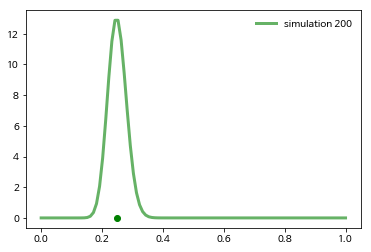

In [116]:
fig, ax = plt.subplots(1, 1)

np.random.seed(777)
x = np.linspace(0, 1, 100)


ax.plot(x, beta.pdf(x, 50, 150), 'g-', lw=3, alpha=0.6, label='simulation 200')
ax.plot(beta.mean(50, 150), 0, 'o', color='green')


ax.legend(loc='best', frameon=False)
plt.show()

# o : 벤치마크
# x : testing

## TS

## 수업 예제



가치(value): 각 밴딧의 성공 확률


행동(action): 특정 밴딧의 슬롯을 당긴다.


보상(reward): 그 밴딧의 성공, 실패 결과

## Portfolio Blending 에서의 활용


가치(value): 성공과 실패에 따라 업데이트된 델타의 분포


   -> 분포로 부터의 임의의 델타, blending coefficient를 추출
    
    
행동(action): MV-EW (MV-VW)를 실시한다. 단 하나의 선택만 존재함


보상(reward): 대신 임의 델타와 델타의 평균값의 크기비교로 성공, 실패를 가려서 blending coefficient를 업데이트

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

## input
# return dataset : 2011 ~ 2019 -> 2015 ~ 2018
# weight : 2015 ~ 2019 -> 2015 ~ 2018

# example
# return_full = pd.DataFrame(np.random.randn(250,4).round(2))
# weight_EW = pd.DataFrame(np.full((50, 4), 0.25))
# weight_MV = pd.DataFrame(np.random.rand(50,4).round(2))

return_full = pd.read_csv('Data_return.csv',encoding='cp949')
return_full = return_full.dropna(axis=0)
return_full = return_full.iloc[208:,1:]
return_full.shape # (260, 173)

weight_EW = pd.read_csv('weight_EW.csv',encoding='cp949')
weight_EW = weight_EW.iloc[1:,1:]

weight_VW = pd.read_csv('weight_VW.csv',encoding='cp949')
weight_VW = weight_VW.iloc[1:,1:]

# weight_MV_var = pd.read_csv('weight_MV_min.csv',encoding='cp949')
# weight_MV_var = weight_MV_var.iloc[:,1:]
# weight_MV_var = weight_MV_var * (1/100)

weight_MV_var = pd.read_csv('mv_df.csv',encoding='cp949').iloc[:,1:]
weight_MV_var.index = weight_VW.index.values
weight_MV_var.columns = weight_VW.columns.values

weight_MV_sha = pd.read_csv('weight_MV_sharpe.csv',encoding='cp949')
weight_MV_sha = weight_MV_sha.iloc[:,1:]
weight_MV_sha = weight_MV_sha * (1/100) # (260, 173)

## output
# TS-EM weight : 2019

In [11]:
portpolio1_weight = weight_MV_var
portpolio2_weight = weight_EW

total_len = return_full.shape[0]
window_len = 200
year_len = 52
col_ = weight_MV_var.columns

weight_TS_EM_test = pd.DataFrame(columns=col_)
optimal_delta_TS_EM = []

# def ThompsonSampling():

# weekly loop
for i in range(year_len) :
    beta_a = 1
    beta_b = 1
    
    # TS loop
    for j in range(window_len) : 
        # mean delta & weight & net retrun
        mean_delta = beta.mean(beta_a, beta_b)
        mean_weight_EM = mean_delta * portpolio1_weight.iloc[(j+i+8),] + \
                        (1-mean_delta) * portpolio2_weight.iloc[(j+i+8),]
        mean_netreturn_EM = return_full.iloc[j+i+8,].T.dot(mean_weight_EM)
        # random delta & weight & net retrun
        rand_delta = beta.rvs(beta_a, beta_b)
        rand_weight_EM = rand_delta * portpolio1_weight.iloc[(j+i+8),] + \
                        (1-rand_delta) * portpolio2_weight.iloc[(j+i+8),]
        rand_netreturn_EM = return_full.iloc[j+i+8,].T.dot(rand_weight_EM)
        # update
        if 1:#np.abs(mean_netreturn_EM - rand_netreturn_EM) > 0.005 :
            if (mean_netreturn_EM > rand_netreturn_EM) == (mean_delta > rand_delta):
            # success
                beta_a += 1
            else : 
            # failure
                beta_b += 1
#             print("%.2f,%.2f & %.2f,%.2f"% (mean_delta,rand_delta,mean_netreturn_EM,rand_netreturn_EM))
#             print("%s,%s"%(mean_delta > rand_delta, mean_netreturn_EM > rand_netreturn_EM))
#             print(beta_a,beta_b)
#         print(beta_a, beta_b)
            
    optimal_delta = beta.mean(beta_a, beta_b)
    optimal_delta_TS_EM.append(optimal_delta) # for 시각화
    tmp_weight_EM = optimal_delta * portpolio1_weight.iloc[(9+199+i),] + \
                    (1-optimal_delta) * portpolio2_weight.iloc[(9+199+i),]
    weight_TS_EM_test = weight_TS_EM_test.append(tmp_weight_EM,ignore_index=True)

In [12]:
portpolio1_weight = weight_MV_var
portpolio2_weight = weight_VW

total_len = return_full.shape[0]
window_len = 200
year_len = 52
col_ = weight_MV_var.columns

weight_TS_VM_test = pd.DataFrame(columns=col_)
optimal_delta_TS_VM = []

# def ThompsonSampling():

# weekly loop
for i in range(year_len) :
    beta_a = 1
    beta_b = 1
    
    # TS loop
    for j in range(window_len) : 
        # mean delta & weight & net retrun
        mean_delta = beta.mean(beta_a, beta_b)
        mean_weight_EM = mean_delta * portpolio1_weight.iloc[(j+i+8),] + \
                        (1-mean_delta) * portpolio2_weight.iloc[(j+i+8),]
        mean_netreturn_EM = return_full.iloc[j+i+8,].T.dot(mean_weight_EM)
        # random delta & weight & net retrun
        rand_delta = beta.rvs(beta_a, beta_b)
        rand_weight_EM = rand_delta * portpolio1_weight.iloc[(j+i+8),] + \
                        (1-rand_delta) * portpolio2_weight.iloc[(j+i+8),]
        rand_netreturn_EM = return_full.iloc[j+i+8,].T.dot(rand_weight_EM)
        # update
        if 1:#np.abs(mean_netreturn_EM - rand_netreturn_EM) > 0.005 :
            if (mean_netreturn_EM > rand_netreturn_EM) == (mean_delta > rand_delta):
            # success
                beta_a += 1
            else : 
            # failure
                beta_b += 1
#             print("%.2f,%.2f & %.2f,%.2f"% (mean_delta,rand_delta,mean_netreturn_EM,rand_netreturn_EM))
#             print("%s,%s"%(mean_delta > rand_delta, mean_netreturn_EM > rand_netreturn_EM))
#             print(beta_a,beta_b)
#     print(beta_a,beta_b)
    optimal_delta = beta.mean(beta_a, beta_b)
    optimal_delta_TS_VM.append(optimal_delta) # for 시각화
    tmp_weight_EM = optimal_delta * portpolio1_weight.iloc[(9+199+i),] + \
                    (1-optimal_delta) * portpolio2_weight.iloc[(9+199+i),]
    weight_TS_VM_test = weight_TS_VM_test.append(tmp_weight_EM,ignore_index=True)

In [13]:
portpolio1_weight = weight_MV_sha
portpolio2_weight = weight_EW

total_len = return_full.shape[0]
window_len = 200
year_len = 52
col_ = weight_MV_var.columns

weight_TS_EM_sha_test = pd.DataFrame(columns=col_)
optimal_delta_TS_EM_sha = []

# def ThompsonSampling():

# weekly loop
for i in range(year_len) :
    beta_a = 1
    beta_b = 1
    
    # TS loop
    for j in range(window_len) : 
        # mean delta & weight & net retrun
        mean_delta = beta.mean(beta_a, beta_b)
        mean_weight_EM = mean_delta * portpolio1_weight.iloc[(j+i+8),] + \
                        (1-mean_delta) * portpolio2_weight.iloc[(j+i+8),]
        mean_netreturn_EM = return_full.iloc[j+i+8,].T.dot(mean_weight_EM)
        # random delta & weight & net retrun
        rand_delta = beta.rvs(beta_a, beta_b)
        rand_weight_EM = rand_delta * portpolio1_weight.iloc[(j+i+8),] + \
                        (1-rand_delta) * portpolio2_weight.iloc[(j+i+8),]
        rand_netreturn_EM = return_full.iloc[j+i+8,].T.dot(rand_weight_EM)
        # update
        if 1:#np.abs(mean_netreturn_EM - rand_netreturn_EM) > 0.005 :
            if (mean_netreturn_EM > rand_netreturn_EM) == (mean_delta > rand_delta):
            # success
                beta_a += 1
            else : 
            # failure
                beta_b += 1
#             print("%.2f,%.2f & %.2f,%.2f"% (mean_delta,rand_delta,mean_netreturn_EM,rand_netreturn_EM))
#             print("%s,%s"%(mean_delta > rand_delta, mean_netreturn_EM > rand_netreturn_EM))
#             print(beta_a,beta_b)
#     print(beta_a,beta_b)
    optimal_delta = beta.mean(beta_a, beta_b)
    optimal_delta_TS_EM_sha.append(optimal_delta) # for 시각화
    tmp_weight_EM = optimal_delta * portpolio1_weight.iloc[(9+199+i),] + \
                    (1-optimal_delta) * portpolio2_weight.iloc[(9+199+i),]
    weight_TS_EM_sha_test = weight_TS_EM_sha_test.append(tmp_weight_EM,ignore_index=True)

In [14]:
portpolio1_weight = weight_MV_sha
portpolio2_weight = weight_VW

total_len = return_full.shape[0]
window_len = 200
year_len = 52
col_ = weight_MV_var.columns

weight_TS_VM_sha_test = pd.DataFrame(columns=col_)
optimal_delta_TS_VM_sha = []

# def ThompsonSampling():

# weekly loop
for i in range(year_len) :
    beta_a = 1
    beta_b = 1
    
    # TS loop
    for j in range(window_len) : 
        # mean delta & weight & net retrun
        mean_delta = beta.mean(beta_a, beta_b)
        mean_weight_EM = mean_delta * portpolio1_weight.iloc[(j+i+8),] + \
                        (1-mean_delta) * portpolio2_weight.iloc[(j+i+8),]
        mean_netreturn_EM = return_full.iloc[j+i+8,].T.dot(mean_weight_EM)
        # random delta & weight & net retrun
        rand_delta = beta.rvs(beta_a, beta_b)
        rand_weight_EM = rand_delta * portpolio1_weight.iloc[(j+i+8),] + \
                        (1-rand_delta) * portpolio2_weight.iloc[(j+i+8),]
        rand_netreturn_EM = return_full.iloc[j+i+8,].T.dot(rand_weight_EM)
        # update
        if 1:#np.abs(mean_netreturn_EM - rand_netreturn_EM) > 0.005 :
            if (mean_netreturn_EM > rand_netreturn_EM) == (mean_delta > rand_delta):
            # success
                beta_a += 1
            else : 
            # failure
                beta_b += 1
#             print("%.2f,%.2f & %.2f,%.2f"% (mean_delta,rand_delta,mean_netreturn_EM,rand_netreturn_EM))
#             print("%s,%s"%(mean_delta > rand_delta, mean_netreturn_EM > rand_netreturn_EM))
#             print(beta_a,beta_b)
#     print(beta_a,beta_b)
    optimal_delta = beta.mean(beta_a, beta_b)
    optimal_delta_TS_VM_sha.append(optimal_delta) # for 시각화
    tmp_weight_EM = optimal_delta * portpolio1_weight.iloc[(9+199+i),] + \
                    (1-optimal_delta) * portpolio2_weight.iloc[(9+199+i),]
    weight_TS_VM_sha_test = weight_TS_VM_sha_test.append(tmp_weight_EM,ignore_index=True)

In [15]:
portpolio1_weight = weight_MV_var
portpolio2_weight = weight_MV_sha

total_len = return_full.shape[0]
window_len = 200
year_len = 52
col_ = weight_MV_var.columns

weight_TS_MV_var_sha_test = pd.DataFrame(columns=col_)
optimal_delta_TS_MV_var_sha = []

# def ThompsonSampling():

# weekly loop
for i in range(year_len) :
    beta_a = 1
    beta_b = 1
    
    # TS loop
    for j in range(window_len) : 
        # mean delta & weight & net retrun
        mean_delta = beta.mean(beta_a, beta_b)
        mean_weight_EM = mean_delta * portpolio1_weight.iloc[(j+i+8),] + \
                        (1-mean_delta) * portpolio2_weight.iloc[(j+i+8),]
        mean_netreturn_EM = return_full.iloc[j+i+8,].T.dot(mean_weight_EM)
        # random delta & weight & net retrun
        rand_delta = beta.rvs(beta_a, beta_b)
        rand_weight_EM = rand_delta * portpolio1_weight.iloc[(j+i+8),] + \
                        (1-rand_delta) * portpolio2_weight.iloc[(j+i+8),]
        rand_netreturn_EM = return_full.iloc[j+i+8,].T.dot(rand_weight_EM)
        # update
        if 1:#np.abs(mean_netreturn_EM - rand_netreturn_EM) > 0.005 :
            if (mean_netreturn_EM > rand_netreturn_EM) == (mean_delta > rand_delta):
            # success
                beta_a += 1
            else : 
            # failure
                beta_b += 1
#             print("%.2f,%.2f & %.2f,%.2f"% (mean_delta,rand_delta,mean_netreturn_EM,rand_netreturn_EM))
#             print("%s,%s"%(mean_delta > rand_delta, mean_netreturn_EM > rand_netreturn_EM))
#             print(beta_a,beta_b)
#     print(beta_a,beta_b)
    optimal_delta = beta.mean(beta_a, beta_b)
    optimal_delta_TS_MV_var_sha.append(optimal_delta) # for 시각화
    tmp_weight_EM = optimal_delta * portpolio1_weight.iloc[(9+199+i),] + \
                    (1-optimal_delta) * portpolio2_weight.iloc[(9+199+i),]
    weight_TS_MV_var_sha_test = weight_TS_MV_var_sha_test.append(tmp_weight_EM,ignore_index=True)

## Sharpe Ratio

In [139]:
def to_return(weight) : 
    gross_return_EM = []
    for i in range(year_len) :
        gross_return_EM.append(weight.iloc[i,].dot(return_test.iloc[i,].T))
    return gross_return_EM

# sharpe ratio
def to_SR(return_lst):
    return np.mean(return_lst)/(np.std(return_lst)) * np.sqrt(52)

year_len = 52
# net_return_EM = []
# for i in range(year_len) :
#     net_return_EM.append(weight_EM.iloc[i,].dot(return_full.iloc[i,].T))

In [17]:
## test용 return
return_test = pd.read_csv('Data_return.csv',encoding='cp949')
return_test = return_test.dropna(axis=0)
return_test = return_test.iloc[416:,1:]

## test용 weight
weight_EW_test = pd.read_csv('weight_EW.csv',encoding='cp949')
weight_EW_test = weight_EW_test.iloc[209:,1:] # 52 x 173

## test용 weight
weight_VW_test = pd.read_csv('weight_VW.csv',encoding='cp949')
weight_VW_test = weight_VW_test.iloc[209:,1:] # 52 x 173

# ## test용 weight
# weight_MV_var_test = pd.read_csv('weight_MV_min.csv',encoding='cp949')
# weight_MV_var_test = weight_MV_var_test.iloc[208:,1:] # 52 x 173
# weight_MV_var_test = weight_MV_var_test * (1/100)

## test용 weight
weight_MV_var_test = pd.read_csv('mv_df.csv',encoding='cp949').iloc[:,1:]
weight_MV_var_test = weight_MV_var_test.iloc[208:,:] # 52 x 173
weight_MV_var_test.index = weight_VW_test.index.values
weight_MV_var_test.columns = weight_VW_test.columns

## test용 weight
weight_MV_sha_test = pd.read_csv('weight_MV_sharpe.csv',encoding='cp949')
weight_MV_sha_test = weight_MV_sha_test.iloc[208:,1:] # 52 x 173
weight_MV_sha_test = weight_MV_sha_test * (1/100)

In [18]:
np.std(to_return(weight_MV_var_test)),np.std(to_return(weight_MV_sha_test))

(0.010790290244567565, 0.018346051248476214)

In [19]:
np.mean(to_return(weight_MV_var_test)),np.mean(to_return(weight_MV_sha_test))

(0.00035253969505929627, 0.004256729427522834)

In [19]:
np.mean(to_return(weight_TS_MV_var_sha_test)),np.std(to_return(weight_TS_MV_var_sha_test))

(0.002872554067308614, 0.014664299555488935)

In [140]:
to_SR(to_return(weight_EW_test))

-0.3664613272331941

In [141]:
to_SR(to_return(weight_VW_test))

0.49356437048095986

In [142]:
to_SR(to_return(weight_MV_var_test))

0.23560069624868046

In [143]:
to_SR(to_return(weight_MV_sha_test))

1.6731509150215431

In [144]:
to_SR(to_return(weight_TS_EM_test))

-0.14781819411641733

In [145]:
to_SR(to_return(weight_TS_VM_test))

0.4228069080259996

In [146]:
to_SR(to_return(weight_TS_EM_sha_test))

0.9866948168079458

In [147]:
to_SR(to_return(weight_TS_VM_sha_test))

1.3155604467334463

In [148]:
to_SR(to_return(weight_TS_MV_var_sha_test)) 

1.412565386029243

## test window의 delta값 변동 (2019 52주)

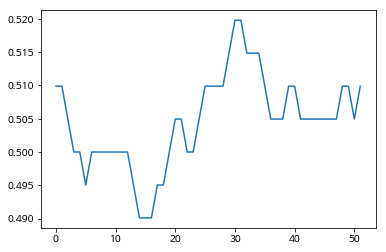

In [518]:
plt.plot(optimal_delta_TS_EM)
plt.show()

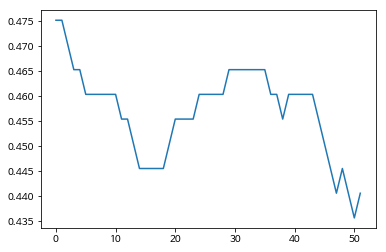

In [483]:
plt.plot(optimal_delta_TS_VM)
plt.show()

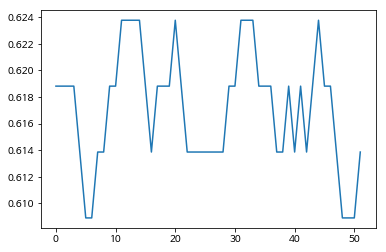

In [495]:
plt.plot(optimal_delta_TS_EM_sha)
plt.show()

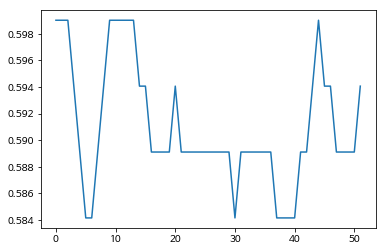

In [496]:
plt.plot(optimal_delta_TS_VM_sha)
plt.show()

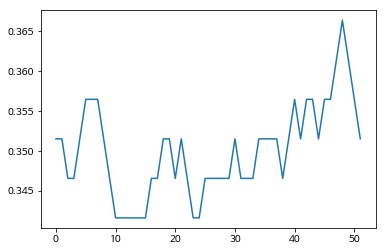

In [20]:
plt.plot(optimal_delta_TS_MV_var_sha)
plt.show()

## 각 포트폴리오의 weight 변동

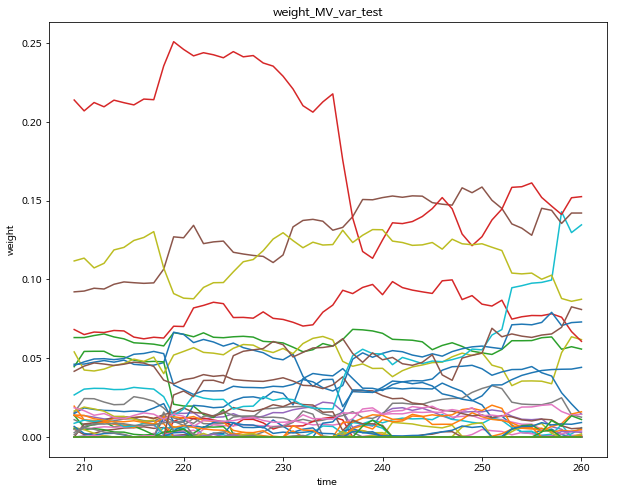

In [519]:
plt.figure(figsize=(10,8))
plt.plot(weight_MV_var_test)
plt.xlabel('time')
plt.ylabel('weight')
plt.title('weight_MV_var_test')
plt.show()

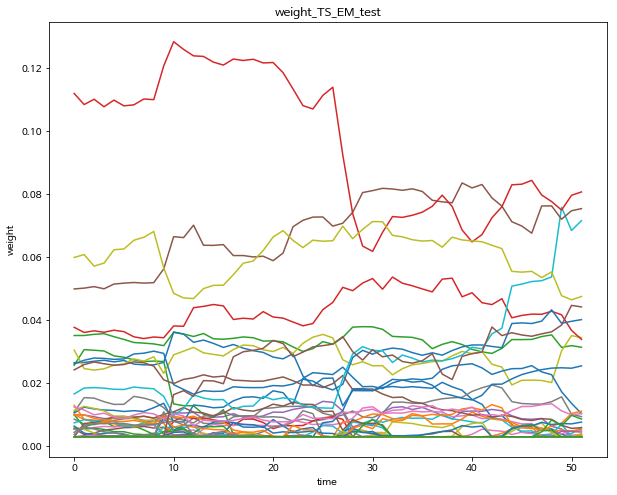

In [515]:
plt.figure(figsize=(10,8))
plt.plot(weight_TS_EM_test)
plt.xlabel('time')
plt.ylabel('weight')
plt.title('weight_TS_EM_test')
plt.show()

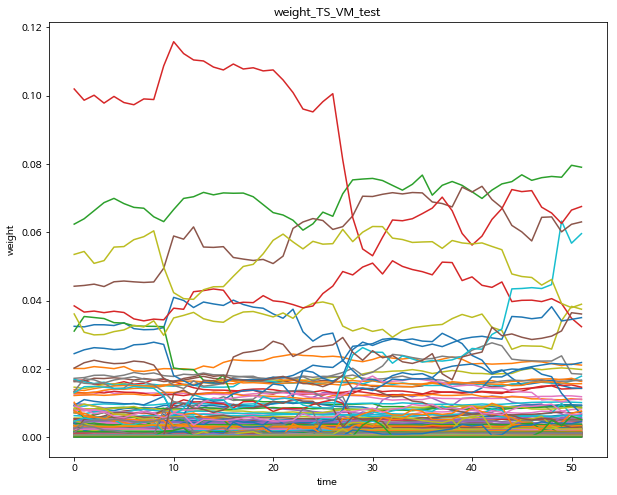

In [516]:
plt.figure(figsize=(10,8))
plt.plot(weight_TS_VM_test)
plt.xlabel('time')
plt.ylabel('weight')
plt.title('weight_TS_VM_test')
plt.show()

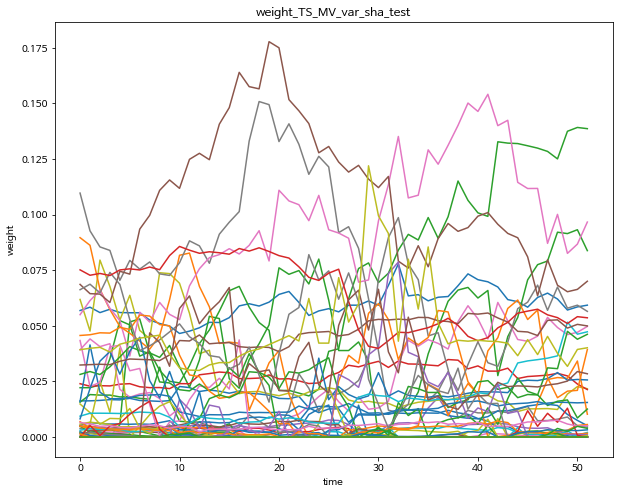

In [21]:
plt.figure(figsize=(10,8))
plt.plot(weight_TS_MV_var_sha_test)
plt.xlabel('time')
plt.ylabel('weight')
plt.title('weight_TS_MV_var_sha_test')
plt.show()

## portpolio 간 gross return 비교

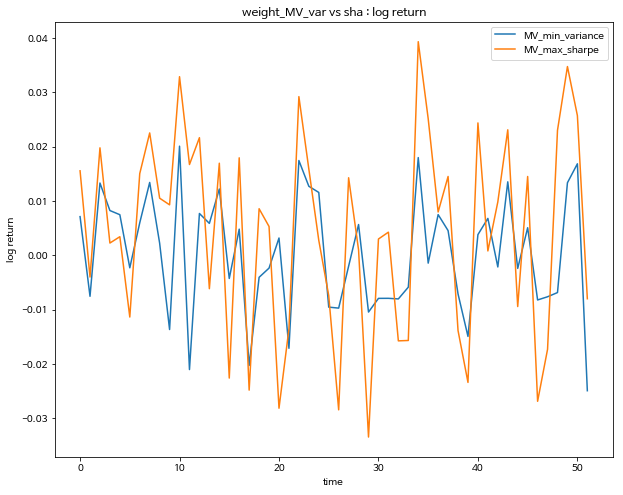

In [26]:
plt.figure(figsize=(10,8))
plt.plot(to_return(weight_MV_var_test),label="MV_min_variance")
plt.plot(to_return(weight_MV_sha_test),label="MV_max_sharpe")
plt.xlabel('time')
plt.ylabel('log return')
plt.title('weight_MV_var vs sha : log return')
plt.legend()
plt.show()

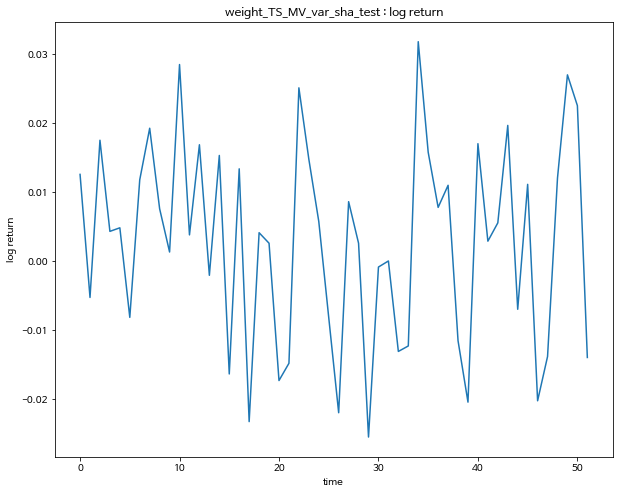

In [44]:
plt.figure(figsize=(10,8))
plt.plot(to_return(weight_TS_MV_var_sha_test))
plt.xlabel('time')
plt.ylabel('log return')
plt.title('weight_TS_MV_var_sha_test : log return')
plt.show()

## 각 Portpolio의 포지션

In [7]:
import matplotlib as mpl

In [151]:
return_test = pd.read_csv('Data_return.csv',encoding='cp949')
return_test = return_test.dropna(axis=0)
return_test = return_test.iloc[416:,1:]

In [153]:
prets = []
pvols = []
noa = return_test.shape[1]
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(return_test.mean() * weights) * 52)
    pvols.append(np.sqrt(np.dot(weights.T,np.dot(return_test.cov() * 52, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

In [150]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o', cmap=mpl.cm.Blues)
plt.grid(True)
# plt.xlim([0.015,0.022])
# plt.ylim([-0.005,0.005])
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

ValueError: operands could not be broadcast together with shapes (2500,) (2500,173,173) 

In [31]:
# def statistics_test(weights):
#     weights = np.array(weights)
#     pret = np.sum(return_test.mean() * weights) * 52
#     pvol = np.sqrt(np.dot(weights.T, np.dot(return_test.cov() * 52, weights)))
#     return np.array([pret, pvol, pret / pvol])

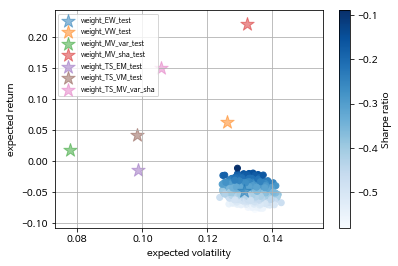

In [137]:
return_test = pd.read_csv('Data_return.csv',encoding='cp949')
return_test = return_test.dropna(axis=0)
return_test = return_test.iloc[416:,1:] 

plt.scatter(pvols, prets, c=prets/pvols, marker='o', cmap=mpl.cm.Blues)
plt.grid(True)
# plt.xlim([0.010,0.022])
# plt.ylim([-0.002,0.005])
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

# pt_opts = statistics_test(weight_TS_MV_var_sha_test).round(3)

# weight_EW_test
# weight_VW_test
# weight_MV_var_test
# weight_MV_sha_test
# weight_TS_EM_test
# weight_TS_VM_test
# weight_TS_EM_sha_test
# weight_TS_VM_sha_test
# weight_TS_MV_var_sha_test

weight = weight_EW_test
plt.scatter(np.std(to_return(weight))*np.sqrt(52), np.mean(to_return(weight))*52, marker="*", s=200, alpha=0.5
           ,label = "weight_EW_test")

weight = weight_VW_test
plt.scatter(np.std(to_return(weight))*np.sqrt(52), np.mean(to_return(weight))*52, marker="*", s=200, alpha=0.5
           ,label = "weight_VW_test")

weight = weight_MV_var_test
plt.scatter(np.std(to_return(weight))*np.sqrt(52), np.mean(to_return(weight))*52, marker="*", s=200, alpha=0.5
           ,label = "weight_MV_var_test")

weight = weight_MV_sha_test
plt.scatter(np.std(to_return(weight))*np.sqrt(52), np.mean(to_return(weight))*52, marker="*", s=200, alpha=0.5
           ,label = "weight_MV_sha_test")

weight = weight_TS_EM_test
plt.scatter(np.std(to_return(weight))*np.sqrt(52), np.mean(to_return(weight))*52, marker="*", s=200, alpha=0.5
           ,label = "weight_TS_EM_test")

weight = weight_TS_VM_test
plt.scatter(np.std(to_return(weight))*np.sqrt(52), np.mean(to_return(weight))*52, marker="*", s=200, alpha=0.5
           ,label = "weight_TS_VM_test")

weight = weight_TS_MV_var_sha_test
plt.scatter(np.std(to_return(weight))*np.sqrt(52), np.mean(to_return(weight))*52, marker="*", s=200, alpha=0.5
           ,label = "weight_TS_MV_var_sha")

plt.legend(fontsize="x-small")

plt.show()